# Titanic Data Analyst Nano-Degree Project
<hr/>

## Project Idea

We are going to analyze Titanic data set. The data set contains details about demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. 

## What are we going to do?

### 1.Understand data
We are going to have a quick look at the data set and understand all the columns.

### 2.Define questions about the data
We will think of some question which will be answered by the data. 

### 3.Prepare data
We will copy the data from CSV file to our analysis application.

### 4.Wrangle data
Here, we are going to clean the dataset and check missing data.

### 5.Analyze data
This part is the most important one, we are going to analyze the data set and try to answer the questions.

### 6.Visualize Data
Data visualization is magic, it allows us to understand what's going on very fast, and we are going to apply them.

### 7.Conclusions Phase
Things don't go always as we like, here we will list some of the limitations we have faced together.

### 7.Share findings 
Finally, a short summary answering the questions we have written above.


<hr/> 

## 1.Understand data

The Titanic dataset contains 891 passengers' details. The dataset's structure is very basic. Each passenger has the following variables.

**PassengerId**: Uniqe idntifaier.<br />
**survival**: Indicates passenger Survival. 0 = No, 1 = Yes.<br />
**pclass**: Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd.<br />
**sex**: Sex.<br />
**Age**: Age in years.<br />
**sibsp**: Number of siblings / spouses aboard the Titanic.<br />
**parch**: Number of parents / children aboard the Titanic.<br />
**ticket**: Ticket number.<br />
**fare**: Passenger fare.<br />
**cabin**: Cabin number.<br />
**embarked**: Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton.<br />

<hr/>

## 2.Define questions about the data
#### After a fast look at the data, I just ask the following questions.
###### 1.What is the percent of females who survived in front of males?
Is the idiom **ladies first** real? or it only in dating?
###### 2. Who get lost by most siblings and parents?
Is being with huge family make you safe.?
###### 3. Is there any relation between the fare and being alive?
Do wealthy people pay more in risky statuses?
###### 4. Did all passengers at the 1st class survived, and 3rd died?
Did the lifeboats split in that way?

<hr/>

## 3.Prepare data
**Now, we are going to copy the CSV file to the notebook to start working with it.**<br/>
First, we need to prepare the libraries which we are going to use them.

In [1]:
# Load Libraries to workspace
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as ma
%matplotlib inline

Second, we are going to load the CSV file into the workspace.

In [2]:
# Load the titanic data CSV file to the workspace using pandas's method read_csv which returns DataFrame
titanic_df = pd.read_csv('titanic-data.csv')
# Print first rows of the data frame
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<hr/>

## 4.Wrangle data
The data already clean and structured in an easy way. But we want to double check its validity and completeness. 

In [3]:
# Find passengers with no Age [Age == NaN]
no_ages = titanic_df[titanic_df["Age"].isnull()]

# Find passengers with no Cabin [Cabin == NaN]
no_cabin = titanic_df[titanic_df["Cabin"].isnull()]

# Find passengers with no Embarked [Embarked == NaN]
no_embarked = titanic_df[titanic_df["Embarked"].isnull()]


print ("Total passengers with no Age is: {}".format(len(no_ages)))
print ("Total passengers with no Cabin is: {}".format(len(no_cabin)))
print ("Total passengers with no Embarked is: {}".format(len(no_embarked)))

# Create Survival Label Column
titanic_df['Survival'] = titanic_df.Survived.map({0 : 'Died', 1 : 'Survived'})

# Create Pclass Label Column
titanic_df['Class'] = titanic_df.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})

# Create Embarked Labels Column
titanic_df['Ports'] = titanic_df.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})

Total passengers with no Age is: 177
Total passengers with no Cabin is: 687
Total passengers with no Embarked is: 2


<hr/>

## 5.Analyze data
The fun just started, now we are going to invistegae the data to try to answer our questions.

In [4]:
# Calculate total passengers
total_passengers = len(titanic_df)

# Calculate total Survived passengers 
total_survived = len(titanic_df[titanic_df["Survived"] == 1]) 

# Calculate total females 
total_females = len(titanic_df[titanic_df["Sex"] == "female"])

# Calculate total males 
total_males = len(titanic_df[titanic_df["Sex"] == "male"])

# Calculate total males who Survived
total_males_survived = len(titanic_df[(titanic_df["Sex"] == "male") & (titanic_df["Survived"] == 1)])

# Calculate total males who Died
total_males_died = len(titanic_df[(titanic_df["Sex"] == "male") & (titanic_df["Survived"] == 0)])

# Calculate total females who Survived
total_females_survived = len(titanic_df[(titanic_df["Sex"] == "female") & (titanic_df["Survived"] == 1)])

# Calculate total females who Died
total_females_died = len(titanic_df[(titanic_df["Sex"] == "female") & (titanic_df["Survived"] == 0)])

percent_males_survived = float(total_males_survived) / float(total_survived)

percent_females_survived = float(total_females_survived) / float(total_survived)

print ("Total passengers in The Titanic was {}".format(total_passengers))
print ("Total males in The Titanic was {}".format(total_males))
print ("Total females in The Titanic was {}".format(total_females))
print ("Total males survived was {}".format(total_males_survived))
print ("Total females survived was {}".format(total_females_survived))
print ("Total males died was {}".format(total_males_died))
print ("Total females died was {}".format(total_females_died))
print ("Percent of males who survived from total survived {} %".format(percent_males_survived * 100))
print ("Percent of females who survived from total survived {} %".format(percent_females_survived * 100))

Total passengers in The Titanic was 891
Total males in The Titanic was 577
Total females in The Titanic was 314
Total males survived was 109
Total females survived was 233
Total males died was 468
Total females died was 81
Percent of males who survived from total survived 31.8713450292 %
Percent of females who survived from total survived 68.1286549708 %


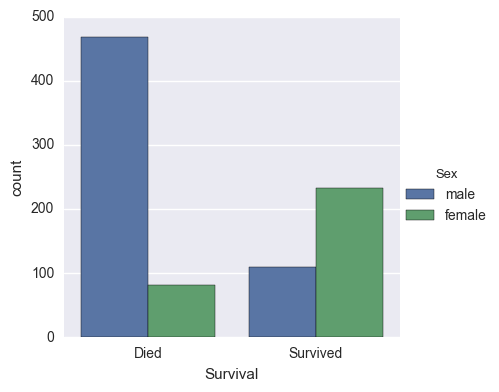

In [5]:
# Visualize Survived & Sex
sns.factorplot(x = 'Survival', data=titanic_df, hue = 'Sex', kind = 'count')

In [6]:
# Calculate total of males and females who died and survived
titanic_df.groupby(['Survived', 'Sex'])[["Sex"]].count()

Sex
Survived Sex        
0        female   81
         male    468
1        female  233
         male    109

In [7]:
# Find all died passengers
died_passengers = titanic_df[titanic_df["Survived"] == 0]

# Count total family for each passenger, SibSp + Parch
died_passengers["total_family"] = died_passengers.apply(lambda x: x["SibSp"] + x["Parch"], axis = 1)

# Find max total family number
max_total_family = died_passengers.loc[died_passengers['total_family'].idxmax()]["total_family"]

print ("The most lost total is {}.".format(max_total_family))

The most lost total is 10.


/anaconda/envs/DAND/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
# Find died passengers who has total family = max total family
most_lost_passengers = died_passengers[died_passengers["total_family"] == max_total_family]

print ("The total of lost passengers who has Parch + SibSp equals maximum ({}) is {}" \
           .format(max_total_family, len(most_lost_passengers)))

most_lost_passengers


The total of lost passengers who has Parch + SibSp equals maximum (10) is 7


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class,Ports,total_family
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Died,Third Class,Southampton,10
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Died,Third Class,Southampton,10
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Died,Third Class,Southampton,10
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Died,Third Class,Southampton,10
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Died,Third Class,Southampton,10
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Died,Third Class,Southampton,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Died,Third Class,Southampton,10


**I can clearly see that the Sage family are the most passengers.**

<hr/>

## 6.Visualize Data
Here we are going to visualize our data and try to answer questions.

([<matplotlib.axis.XTick at 0x1108c4fd0>,
 <a list of 2 Text xticklabel objects>)

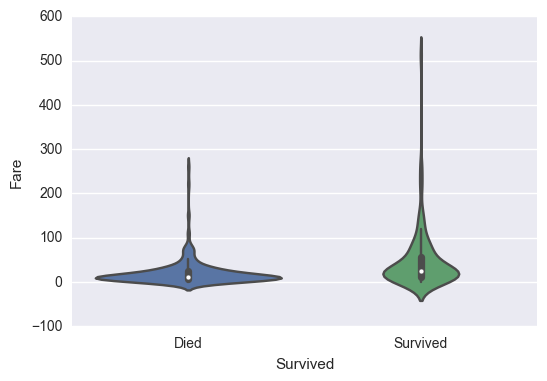

In [9]:
# Trying to find a relation between Survived and Fare
sns.violinplot(x="Survived", y="Fare", data=titanic_df)
plt.xticks([0,1], ['Died', 'Survived']) 

The above visualization divide people wither they died or survived. Also, it divides them based on the fare paid. 


The diagram explains that there is no relation between the paid amount and survived. Because, many points (Passengers) paid a very low amount and died, also many of them survived. 


**I can't see any relation between the paid amount [Fare] and [Survived].**

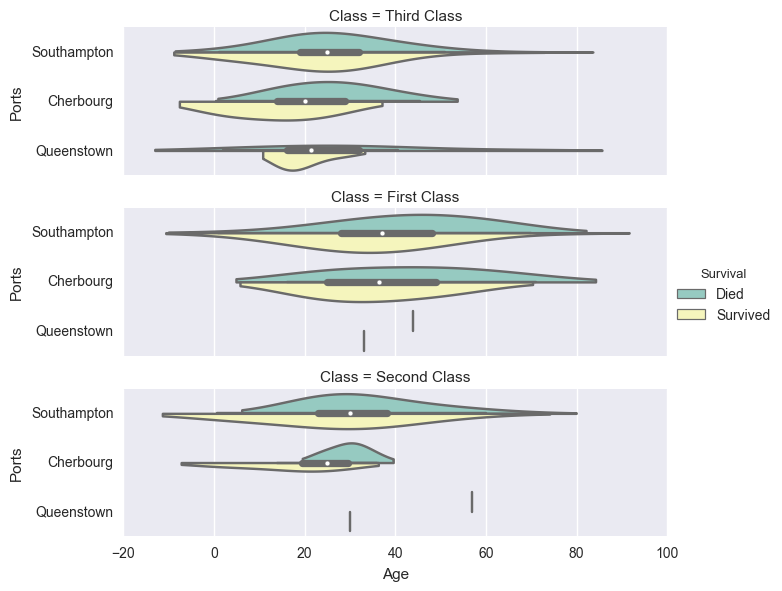

In [10]:
pclass_serviced = sns.factorplot(x="Age", y="Ports", \
                    hue="Survival", row="Class", \
                    data=titanic_df[titanic_df.Ports.notnull()], \
                    orient="h", size=2, aspect=3.5, palette="Set3", \
                    kind="violin", split=True, cut=1, bw=.8) 

The above visualization split passengers based on thier classes [First, Secound or Thired]. Then split each group based on ports [Southampton, Cherbourg or Queenstown]. 

The visualization shows that the most passengers at the first and secound classes are from Southampton and Cherbourg. Also, it shows that most Queenstown's citizens are of the third class and most of them died.

<hr/>

## 7.Conclusions Phase

Before we finish, we have to say some points to clearify our analysis.

The Titanic dataset is just a sample of 891 from the 2224 total passengers.<br/> 
The dataset contains missing data at some fields for some of the passengers.<br/> 
<ul>
<li>
Some passengers are with no Age and Cabin.!
</li>
<li>
Embarked field is empty for 2 passengres.
</li>
<li>
I wish that there was little bit more description about the relations SibSp and Parch. Where I can apply further analysis on that part.
</li>
<li>
I did not work with ages so much, if I used to do it. I will fill it with the mean of ages.
</li>
<li>
Finally, correlation doesn't imply causation.
</li>
</ul>

<hr/>

## 8.Share findings
After an amazing journey over the dataset, we find together many important things which helped us answering the questions which we wrote at the beginning.

** Q1.What is the percent of females who survived in front of males?**

A1: 

Percent of males who survived from total survived = 31.9%

Percent of females who survived from total survived = 68.1%

** This is little bit confusing, as the males are completing 65% of total passengers.! I can say that ladies first iis correct.**

** Q2. Who get lost by most siblings and parents?**

A2: 

The maximum number of Parch and SibSp for a passenger is 10. 7 Died passengers were having a total of 10 Parch and SibSp on the Titanic. The strange thing is that all the 7 passengers were from **Sage family**. They start the journey from Southampton and they were all in the third class.

**Being with your family in hard situations is bad, who should help whom? You may all survive or died**

** Q3. Is there any relation between the fare and being alive?**

A3: 

I didn't find any relation between the fare paid and being alive. 
**Wealthy people not always have the chance to pay, even if they want to do.**

** Q4. Did all passengers at the 1st class survived, and 3rd died?**

A4: 

Many passengers from all classes died and survived, which means if you were at the first class you may die, or if you were at the third class you may survive.

**Lifeboats were split in a normal way, not for only first class.**